In [1]:
!pip install missingpy
!pip install sweetviz
import sweetviz as sv
import missingno as msno 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#from missingpy import MissForest
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
from scipy import stats
from scipy.stats import norm
from plotnine import *
from time import time
from collections import Counter
from pandas import set_option, read_csv, DataFrame, to_numeric
set_option('mode.chained_assignment',None)
from numpy import zeros, where, round

## Pre-processing functions
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Metrics
from sklearn.metrics import confusion_matrix, classification_report

## Imbalance-data functions
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

## tensorflow-Keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 15.1 MB 6.3 MB/s 


In [38]:
datos = pd.read_csv('in-vehicle-coupon-recommendation (1).csv') 
print(datos.columns)
print(datos.head())
print(datos.info())
# Cantidad de registros
print("cantidad de registros", datos.count())
datos.describe()

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
       destination  passanger weather  ...  direction_same direction_opp  Y
0  No Urgent Place      Alone   Sunny  ...               0             1  1
1  No Urgent Place  Friend(s)   Sunny  ...               0             1  0
2  No Urgent Place  Friend(s)   Sunny  ...               0             1  1
3  No Urgent Place  Friend(s)   Sunny  ...               0             1  0
4  No Urgent Place  Friend(s)   Sunny  ...               0             1  0

[5 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


AxesSubplot(0.125,0.125;0.698618x0.755)


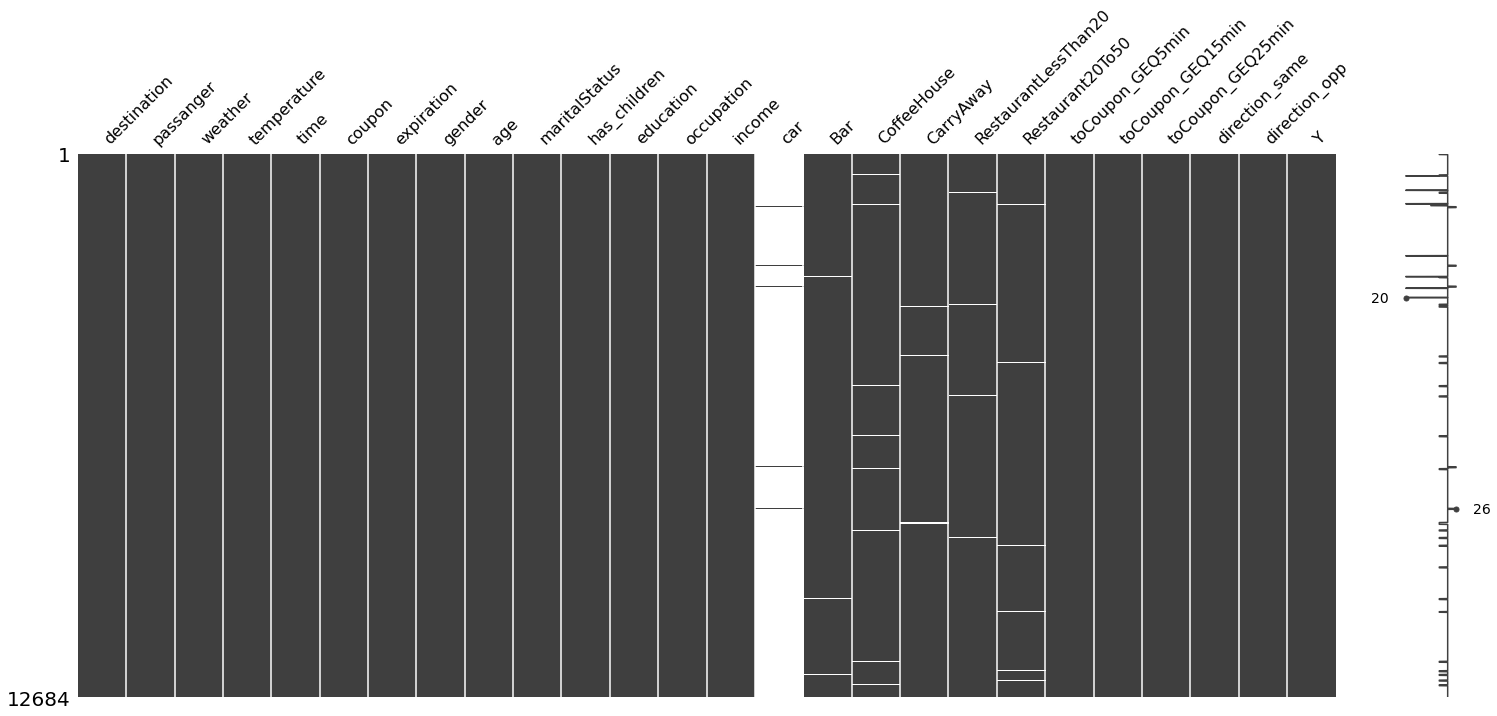

In [3]:
print(msno.matrix(datos))

In [39]:
datos = datos.drop(['car'], axis=1)
print(datos.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


AxesSubplot(0.125,0.125;0.698618x0.755)


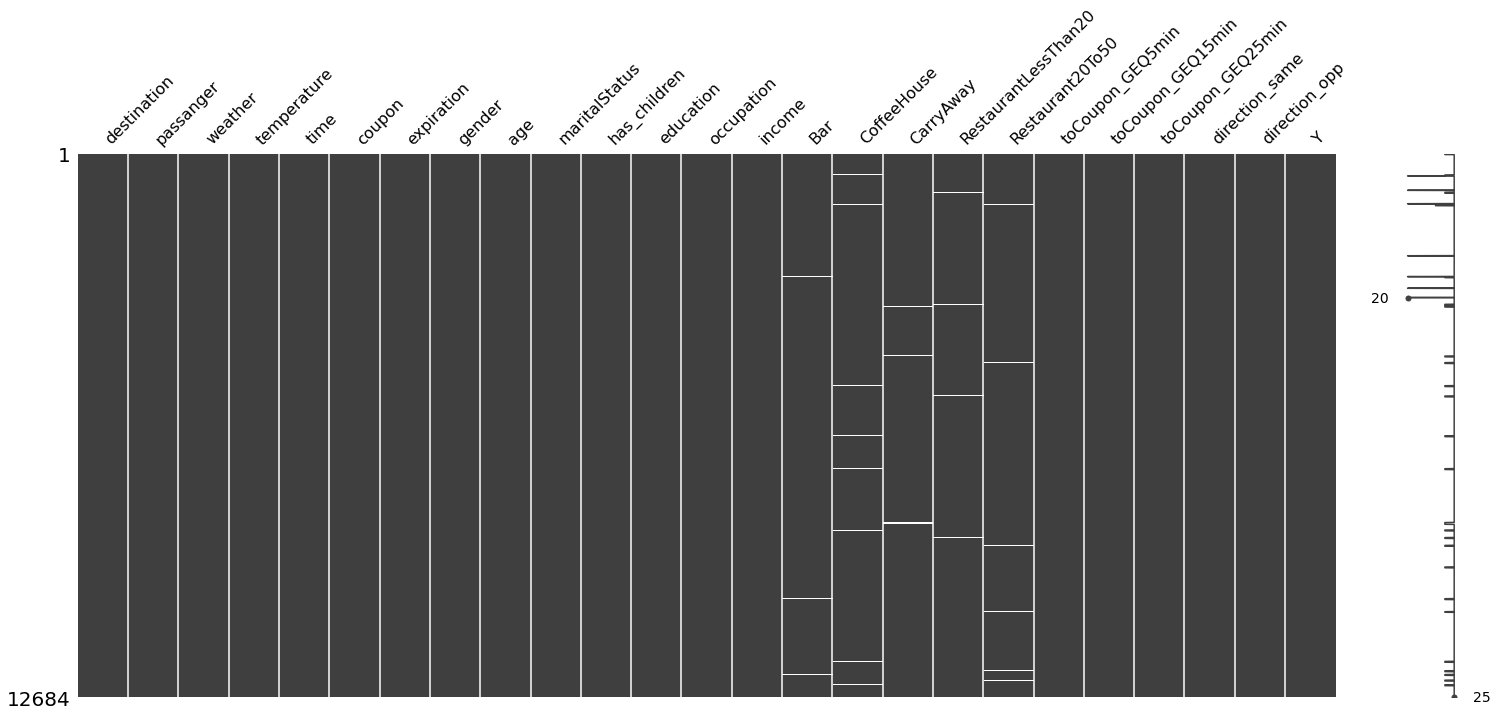

In [5]:
print(msno.matrix(datos))

AxesSubplot(0.125,0.125;0.698618x0.755)


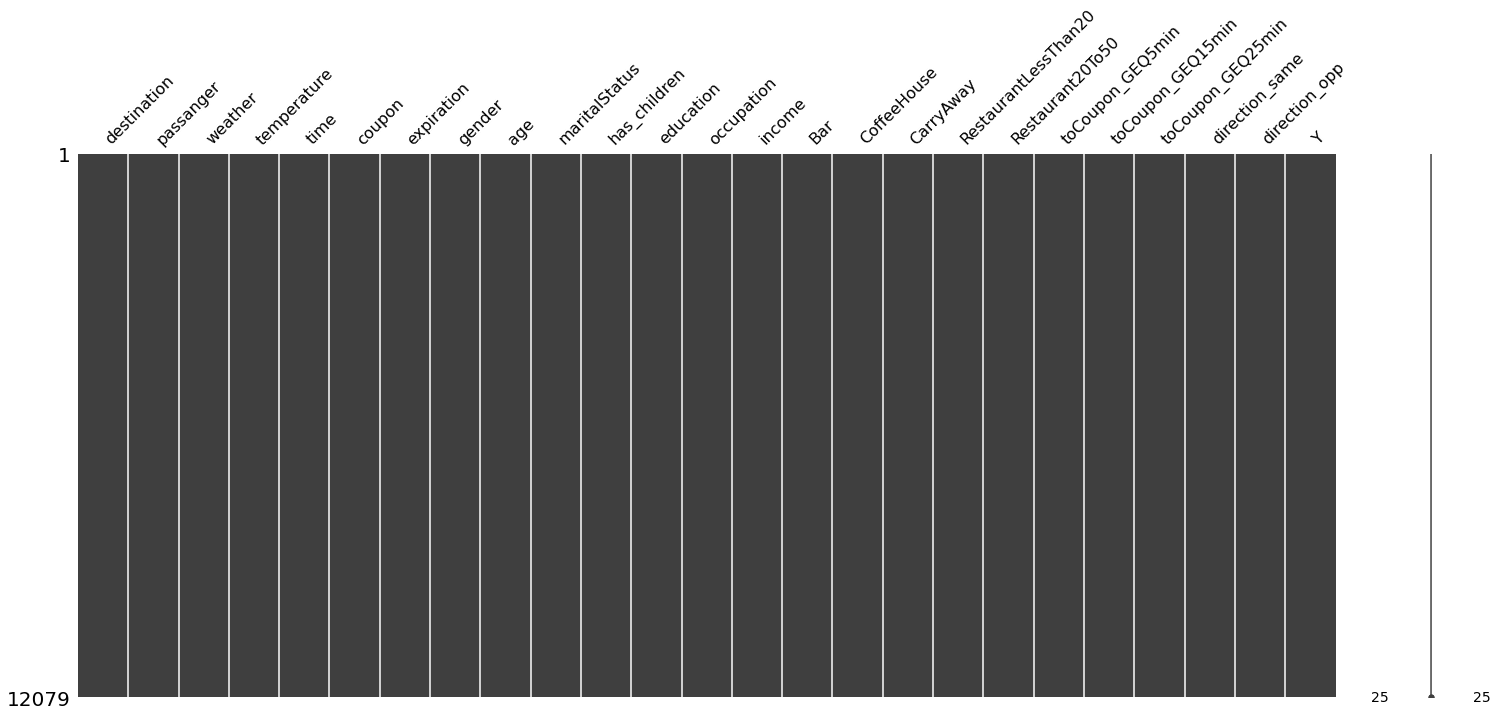

In [32]:
datos = datos.dropna()
print(msno.matrix(datos))

In [40]:
datos = datos.drop(['weather','temperature'], axis=1)

In [8]:
print(datos.columns)

Index(['destination', 'passanger', 'time', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'education', 'occupation',
       'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [41]:
condicion1 = [
              
    (datos['occupation'] == 'Unemployed') ,
    (datos['occupation'] == 'Student'),
    (datos['occupation'] == 'Computer & Mathematical'),
    (datos['occupation'] == 'Sales & Related'),
    (datos['occupation'] == 'Education&Training&Library'),
    (datos['occupation'] == 'Management'),

    ((datos['occupation'] == 'Office & Administrative Support') | (datos['occupation'] == 'Arts Design Entertainment Sports & Media')),
    
    ((datos['occupation'] == 'Business & Financial')  | (datos['occupation'] == 'Retired')),

    ((datos['occupation'] == 'Food Preparation & Serving Related') | (datos['occupation'] == 'Healthcare Practitioners & Technical') |
    (datos['occupation'] == 'Healthcare Support') | (datos['occupation'] == 'Community & Social Services')) ,

    ((datos['occupation'] == 'Legal') | (datos['occupation'] == 'Transportation & Material Moving') |
    (datos['occupation'] == 'Personal Care & Service') | (datos['occupation'] == 'Architecture & Engineering')),
    
    ((datos['occupation'] == 'Protective Service')  |
    (datos['occupation'] == 'Life Physical Social Science') | (datos['occupation'] == 'Construction & Extraction') |
    (datos['occupation'] == 'Installation Maintenance & Repair') | (datos['occupation'] == 'Production Occupations') |
    (datos['occupation'] == 'Building & Grounds Cleaning & Maintenance') | (datos['occupation'] == 'Farming Fishing & Forestry')) 
    ]
valores1 = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6', 'Grupo 7', 'Grupo 8', 'Grupo 9', 'Grupo 10', 'Grupo 11']
datos['occupation'] = np.select(condicion1, valores1)
datos['occupation'] = datos['occupation'].astype(object)

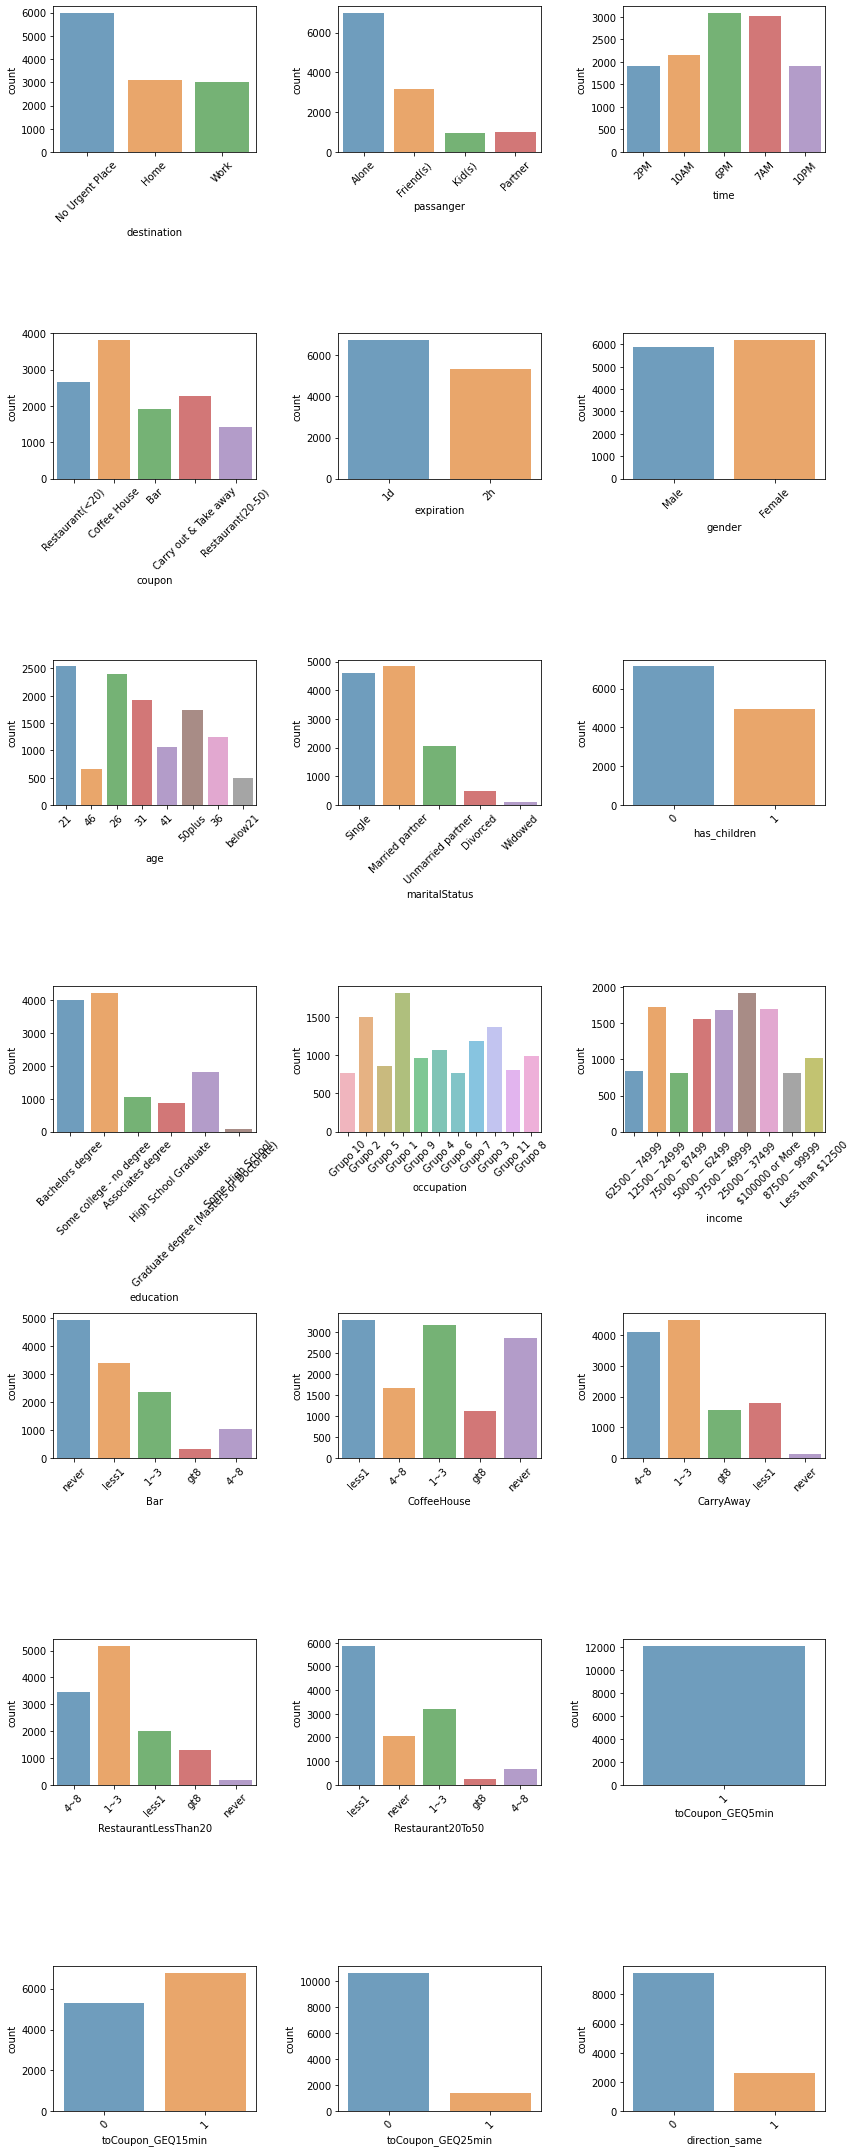

In [11]:
fig, axes = plt.subplots(round(int(len(datos.columns) / 3)), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(datos.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=datos.columns[i], alpha=0.7, data=datos, ax=ax)
fig.tight_layout()

In [42]:
print("education",datos['education'].value_counts())

education Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64


In [43]:
condicion2 = [
              
    (datos['education'] == 'Some college - no degree') ,
    (datos['education'] == 'Bachelors degree'),

    ((datos['education'] == 'Graduate degree (Masters or Doctorate)') | (datos['education'] == 'Associates degree') |
    (datos['education'] == 'High School Graduate')  | (datos['education'] == 'Some High School')),

    
    ]
valores2 = ['Grupo 1', 'Grupo 2', 'Grupo 3']
datos['education'] = np.select(condicion2, valores2)
datos['education'] = datos['education'].astype(object)

In [44]:
print("education",datos['education'].value_counts())

education Grupo 1    4351
Grupo 2    4335
Grupo 3    3998
Name: education, dtype: int64


In [ ]:
# #Multi-category variables

# oe = OneHotEncoder(sparse=False, handle_unknown = 'error')
# oe.fit(datos[['destination','expiration','gender','passanger', 'weather', 'temperature', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
#               'RestaurantLessThan20','Restaurant20To50']])

# #  transformamos las variables.
# multi = oe.transform(datos[['destination','expiration','gender','passanger', 'weather', 'temperature', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse',
#                             'CarryAway','RestaurantLessThan20','Restaurant20To50']])
# df_multi = pd.DataFrame(index = datos.index, data=multi, columns=oe.get_feature_names(['destination','expiration','gender','passanger', 'weather', 'temperature', 'time', 'coupon','age','maritalStatus',
#                                                                                        'education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']))
# df = pd.concat([datos, df_multi], axis=1)
# df.drop(columns=['destination','expiration','gender','passanger', 'weather', 'temperature', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
#                  'RestaurantLessThan20','Restaurant20To50'], inplace=True)

# print(df.columns)
# print(df.shape)

In [45]:
#Multi-category variables

oe = OneHotEncoder(sparse=False, handle_unknown = 'error')
oe.fit(datos[['destination','expiration','gender','passanger', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
              'RestaurantLessThan20','Restaurant20To50']])

#  transformamos las variables.
multi = oe.transform(datos[['destination','expiration','gender','passanger', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse',
                            'CarryAway','RestaurantLessThan20','Restaurant20To50']])
df_multi = pd.DataFrame(index = datos.index, data=multi, columns=oe.get_feature_names(['destination','expiration','gender','passanger','time', 'coupon','age','maritalStatus',
                                                                                       'education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']))
df = pd.concat([datos, df_multi], axis=1)
df.drop(columns=['destination','expiration','gender','passanger', 'time', 'coupon','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
                 'RestaurantLessThan20','Restaurant20To50'], inplace=True)

print(df.columns)
print(df.shape)

Index(['has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'expiration_1d', 'expiration_2h', 'gender_Female', 'gender_Male',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM',
       'time_7AM', 'coupon_Bar', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'age_21', 'age_26', 'age_31', 'age_36',
       'age_41', 'age_46', 'age_50plus', 'age_below21',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Grupo 1', 'education_Grupo 2',
       'education_Grupo 3', 'occupation_Grupo 1', 'occupation_Grupo 10',
       'occupation_Grupo 11', 'occupati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
#Función para plotear las metricas
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

    @param width: width of the graphic display
    @type width: int

    @param height: height of the graphic display
    @type height: int

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

In [47]:
df.head()

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,expiration_1d,expiration_2h,gender_Female,gender_Male,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,...,occupation_Grupo 9,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,Bar_nan,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CoffeeHouse_nan,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,CarryAway_nan,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,RestaurantLessThan20_nan,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Restaurant20To50_nan
0,1,1,0,0,0,1,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,0,0,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,0,0,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,0,0,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
x = df.drop(columns=['Y'])
y = df['Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
mn = MinMaxScaler()
x_train_scaled = pd.DataFrame(mn.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(mn.fit_transform(x_test), columns = x_test.columns)

x_train_scaled.head()

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,expiration_1d,expiration_2h,gender_Female,gender_Male,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,...,occupation_Grupo 9,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,Bar_nan,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CoffeeHouse_nan,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,CarryAway_nan,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,RestaurantLessThan20_nan,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Restaurant20To50_nan
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
## Build model
model = Sequential(name='Coupon_MKT')
model.add(layers.Input(shape=x_train_scaled.shape[1]))
model.add(layers.Dense(units=100, activation='relu', name='Dense_01'))
model.add(layers.Dropout(rate=0.5, name='Dropout_01')) # rate: % de conexiones a apagar
model.add(layers.Dense(units=24, activation='relu', name='Dense_02'))
model.add(layers.Dropout(rate=0.1, name='Dropout_02'))
model.add(layers.Dense(units=1, activation='sigmoid', name='output'))

## Compiler setting
model.compile(loss='binary_crossentropy', metrics=['accuracy', AUC()],
              optimizer=Adam(learning_rate=0.0001))

## Display model
model.summary()

Model: "Coupon_MKT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_01 (Dense)            (None, 100)               9400      
                                                                 
 Dropout_01 (Dropout)        (None, 100)               0         
                                                                 
 Dense_02 (Dense)            (None, 24)                2424      
                                                                 
 Dropout_02 (Dropout)        (None, 24)                0         
                                                                 
 output (Dense)              (None, 1)                 25        
                                                                 
Total params: 11,849
Trainable params: 11,849
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=150, batch_size=50, verbose=1)

Epoch 1/150
203/203 [==============================] - 2s 4ms/step - loss: 0.6937 - accuracy: 0.5449 - auc_1: 0.5163 - val_loss: 0.6788 - val_accuracy: 0.5743 - val_auc_1: 0.5744
Epoch 2/150
203/203 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5628 - auc_1: 0.5526 - val_loss: 0.6699 - val_accuracy: 0.6027 - val_auc_1: 0.6189
Epoch 3/150
203/203 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5808 - auc_1: 0.5869 - val_loss: 0.6623 - val_accuracy: 0.6141 - val_auc_1: 0.6467
Epoch 4/150
203/203 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6010 - auc_1: 0.6106 - val_loss: 0.6554 - val_accuracy: 0.6346 - val_auc_1: 0.6643
Epoch 5/150
203/203 [==============================] - 1s 3ms/step - loss: 0.6533 - accuracy: 0.6179 - auc_1: 0.6402 - val_loss: 0.6485 - val_accuracy: 0.6393 - val_auc_1: 0.6761
Epoch 6/150
203/203 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6198 - au

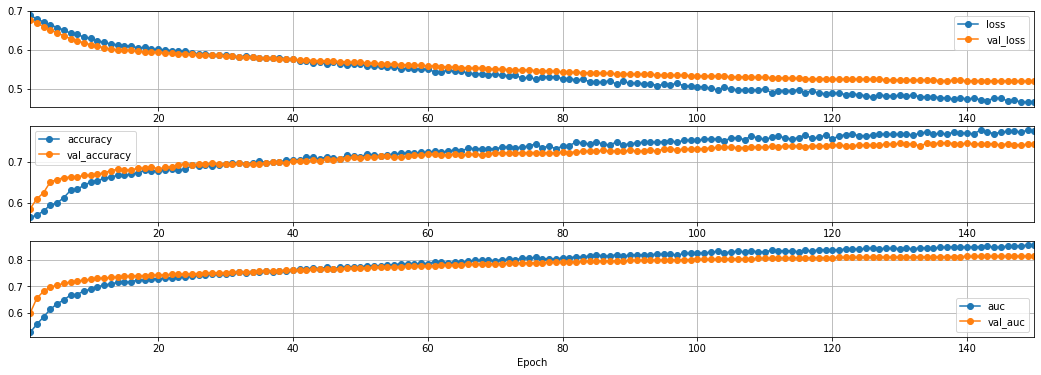

In [52]:
plot_history(history, width=18)

In [ ]:
## Prediction as prob-value
prediction = model.predict(x_test)

## Decode value to class
prediction_class = round(prediction.ravel())

In [ ]:
prediction_class

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
## Display confusion matrix
confusion_matrix(y_true=y_test, y_pred=prediction_class)

array([[1030,  513],
       [ 417, 1664]])

In [ ]:
## Display number of sample per class in test data
Counter(y_test)

Counter({0: 1543, 1: 2081})

In [ ]:
print(classification_report(y_true=y_test, y_pred=prediction_class))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1543
           1       0.76      0.80      0.78      2081

    accuracy                           0.74      3624
   macro avg       0.74      0.73      0.74      3624
weighted avg       0.74      0.74      0.74      3624

